# Titanic data analysis

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline

### 1.Collecting data

In [59]:
titanic_data = pd.read_csv('train.csv')

In [60]:
#number of columns
len(titanic_data.columns)

12

In [4]:
#number of rows
len(titanic_data)

891

In [5]:
titanic_data.head(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


In [6]:
titanic_data.shape

(891, 12)

In [7]:
print('total number of passengers in the data is:', str(len(titanic_data)))

total number of passengers in the data is: 891


### 2. Analysing data

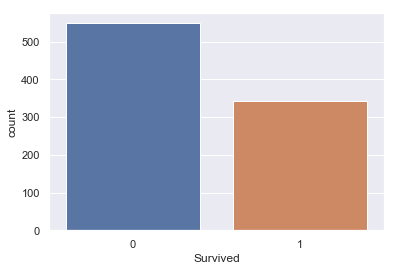

In [8]:
sns.set(style="darkgrid")
sns.countplot(x='Survived',data=titanic_data)

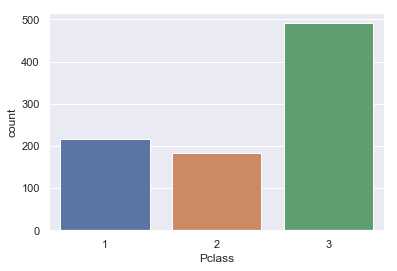

In [9]:
sns.set(style="darkgrid")
sns.countplot(x='Pclass',data=titanic_data)

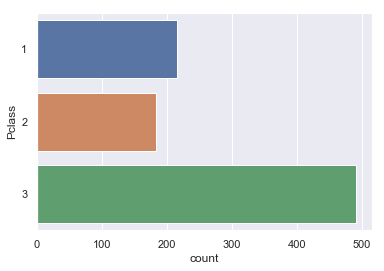

In [10]:
sns.set(style="darkgrid")
sns.countplot(y='Pclass',data=titanic_data)
#note: we changed 'x' to 'y' inside countplot parameter

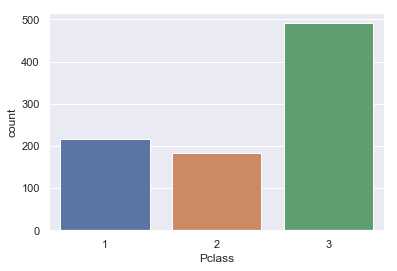

In [11]:
sns.countplot(x='Pclass',data=titanic_data)

In [12]:
titanic_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

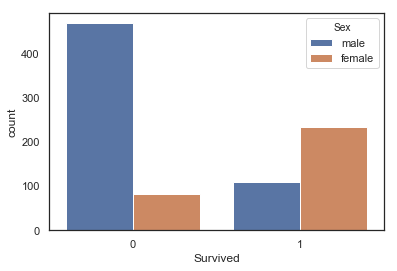

In [13]:
sns.set(style='white')
sns.countplot(data=titanic_data,x='Survived',hue='Sex')

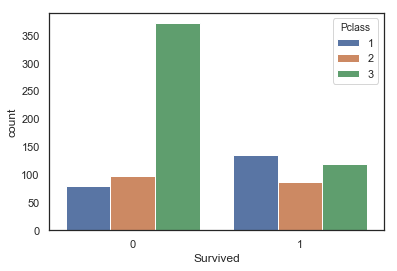

In [14]:
sns.countplot(data=titanic_data,x='Survived',hue='Pclass')
# 0 for passengers who didn't survived
# 1 for passeners who survived

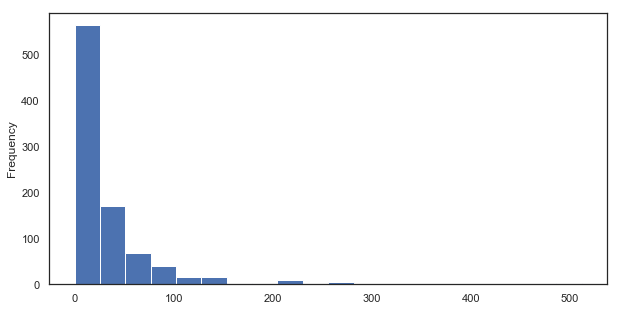

In [15]:
titanic_data['Fare'].plot.hist(figsize=(10,5),bins=20)

In [16]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


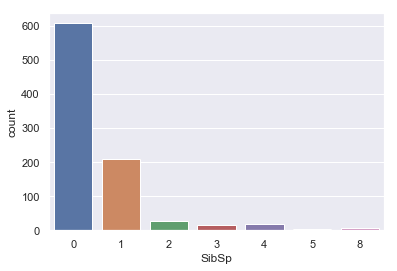

In [17]:
sns.set(style='darkgrid')
sns.countplot(data=titanic_data,x='SibSp')

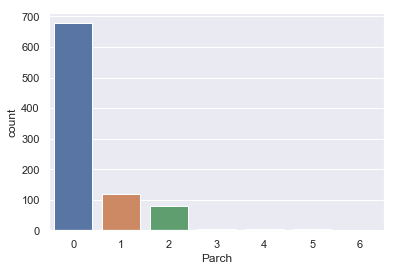

In [18]:
sns.countplot(data=titanic_data,x='Parch')

## 3. Data wrangling

In [61]:
titanic_data[['Cabin','Embarked']].head()

,Cabin,Embarked
0,NaN,S
1,C85,C
2,NaN,S
3,C123,S
4,NaN,S


In [62]:
titanic_data.loc[:,'Fare':].head()

,Fare,Cabin,Embarked
0,7.2500,NaN,S
1,71.2833,C85,C
2,7.9250,NaN,S
3,53.1000,C123,S
4,8.0500,NaN,S


In [63]:
titanic_data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
5,False,False,False,False,False,True,False,False,False,False,True,False
6,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,True,False
8,False,False,False,False,False,False,False,False,False,False,True,False
9,False,False,False,False,False,False,False,False,False,False,True,False


In [64]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

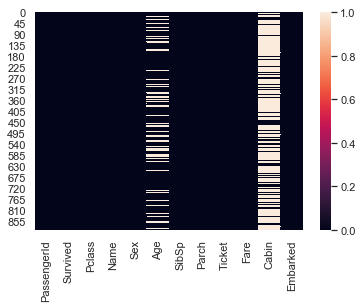

In [65]:
sns.heatmap(titanic_data.isnull())

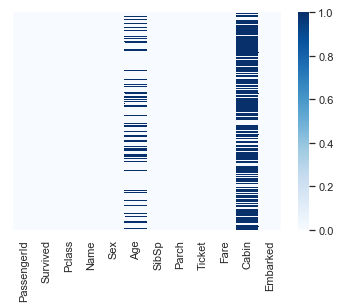

In [66]:
sns.heatmap(titanic_data.isnull(),yticklabels=False,cmap='Blues')

TESTING heatmap

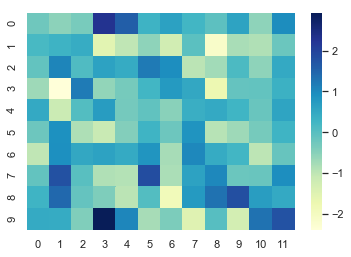

In [67]:
normal_data=np.random.randn(10,12)
sns.heatmap(normal_data,cmap="YlGnBu")

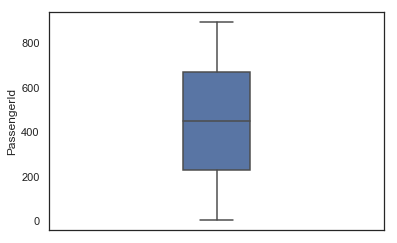

In [68]:
sns.boxplot(data=titanic_data,x='PassengerId',orient='v',width=0.2)

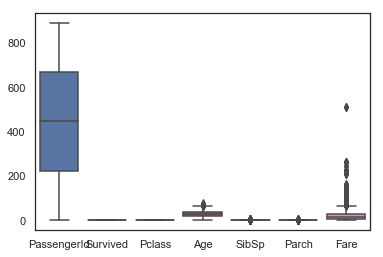

In [69]:
sns.boxplot(data=titanic_data)

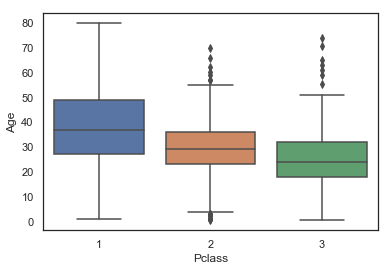

In [70]:
sns.set(style='white')
sns.boxplot(data=titanic_data,x='Pclass',y='Age')

In [71]:
titanic_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


testing drop command

In [72]:
df = pd.DataFrame(np.arange(12).reshape(3,4),columns=['A', 'B', 'C', 'D'])

In [73]:
df
# pd.DataFrame(np.arange(12).reshape(3,4))

,A,B,C,D
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11


In [74]:
#to drop entire row, axix=0 by default
df.drop([2])

,A,B,C,D
0,0,1,2,3
1,4,5,6,7


In [75]:
#to drop columns use axis=1
df.drop(['C'],axis=1)

,A,B,D
0,0,1,3
1,4,5,7
2,8,9,11


In [76]:
#dropping Cabin column
titanic_data.drop(['Cabin'],axis=1,inplace=True)

In [77]:
titanic_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [78]:
titanic_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [79]:
titanic_data.dropna(inplace=False,thresh=50,how='any')
#here use thresh carefully

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked


In [80]:
titanic_data.shape

(891, 11)

In [81]:
titanic_data=pd.read_csv('train.csv')

In [82]:
titanic_data.drop(['Cabin'],axis=1,inplace=True)

In [83]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [84]:
titanic_data.dropna(inplace=True)

In [85]:
titanic_data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

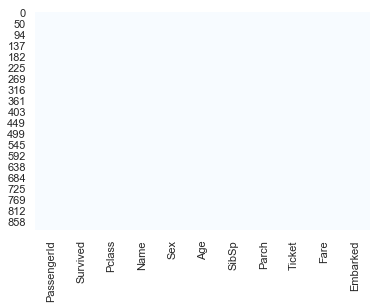

In [86]:
sns.heatmap(titanic_data.isna(),cmap='Blues',cbar=False)

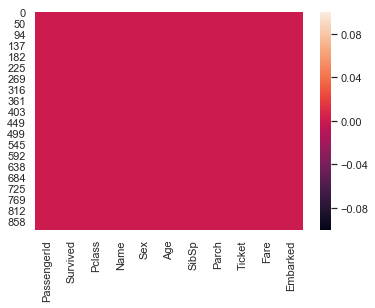

In [87]:
sns.heatmap(titanic_data.isnull())

In [88]:
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [89]:
pd.get_dummies(titanic_data['Sex']).head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [90]:
sex = pd.get_dummies(titanic_data['Sex'],drop_first=True)
sex.head(5)

,male
0,1
1,0
2,0
3,0
4,1


In [91]:
titanic_data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C


In [92]:
embark = pd.get_dummies(titanic_data['Embarked'])
embark.head(4)

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1


In [93]:
embark = pd.get_dummies(titanic_data['Embarked'],drop_first=True)
embark.head(4)

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1


In [94]:
Pcl = pd.get_dummies(titanic_data['Pclass'])
Pcl.head(3)

,1,2,3
0,0,0,1
1,1,0,0
2,0,0,1


In [95]:
Pcl = pd.get_dummies(titanic_data['Pclass'],drop_first=True)
Pcl.head(3)

,2,3
0,0,1
1,0,0
2,0,1


In [96]:
titanic_data  = pd.concat([titanic_data,sex,embark,Pcl],axis=1)

In [97]:
titanic_data.head(4)
#note that last 5 columns are added in titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1,0,0


In [98]:
titanic_data.drop(['Sex','Embarked','Pclass','PassengerId','Name','Ticket'],axis=1,inplace=True)

In [99]:
titanic_data.drop(['Name'],axis=1)

KeyError: "['Name'] not found in axis"

In [ ]:
titanic_data.head()

## 4. Train and Test data

In [100]:
# x is the feature variable, independent variable
x = titanic_data.drop('Survived',axis=1)
y = titanic_data['Survived']
# y is the value you need to predict, dependent variable

In [101]:
x.head()

,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,22.0,1,0,7.2500,1,0,1,0,1
1,38.0,1,0,71.2833,0,0,0,0,0
2,26.0,0,0,7.9250,0,0,1,0,1
3,35.0,1,0,53.1000,0,0,1,0,0
4,35.0,0,0,8.0500,1,0,1,0,1


In [102]:
from sklearn.cross_validation import train_test_split

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [103]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [104]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1 )

In [105]:
from sklearn.linear_model import LogisticRegression

In [106]:
logmodel = LogisticRegression()

In [107]:
logmodel.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [108]:
predictions = logmodel.predict(x_test)

In [109]:
predictions

array([1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0], dtype=int64)

In [110]:
from sklearn.metrics import classification_report

In [111]:
classification_report(y_test,predictions)

'             precision    recall  f1-score   support\n\n          0       0.81      0.83      0.82       126\n          1       0.75      0.72      0.73        88\n\navg / total       0.78      0.79      0.78       214\n'

In [112]:
from sklearn.metrics import confusion_matrix

In [113]:
confusion_matrix(y_test,predictions)

array([[105,  21],
       [ 25,  63]], dtype=int64)

### using confusion matrix we can also caluclate the accuracy as follows:

accuracy = (105+63)/(105+21+25+63)

In [114]:
from sklearn.metrics import accuracy_score

In [115]:
accuracy_score(y_test,predictions)

0.7850467289719626

# decision tree

In [116]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
model=DecisionTreeClassifier()


In [117]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=6)

In [118]:
model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [119]:
from sklearn.metrics import accuracy_score

In [120]:
predictions = model.predict(X_test)

In [121]:
accuracy_score(y_test,predictions)

0.7617021276595745